In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random as rdn

# Bài 1: Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [14]:
data = pd.read_csv("data_square.csv").values
data

array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ],
       [  42.069 , -437.099 ],
       [  44.4828, -469.56  ],
       [  46.8966, -490.369 ],
       [  49.3103, -499.524 ],
       [  51.7241, -497.027 ],
       [  54.1379, -482.878 ],
       [  56.5517, -457.075 ],
       [  58.9655, -419.62  ],
       [  61.3793, -370.511 ],
       [  63.7931, -309.75  ],
       [  66.2069, -237.337 ],
       [  68.6207, -153.27  ],
       [  71.0345,  -57.5505],
       [  73.4483,   49.8216],
       [  75.8621,  168.847 ],
       [  78.2759,  299.524 ],
       [  80.6897,  441.855 ],
       [  83.1034,  595.838 ],
       [  85.5172,  761.474 ],
       [  87.931 ,  938.763 ],
       [  90.3448, 1127.71  ],
       [  92.7586, 1328.3   ],
       [  95.1724, 1540.55  ],
       [  97.5862, 1764.45  ],
       [ 100.    , 2000.    ]])

In [18]:
x = data[:, 0]
y = data[:, 1]
print(x)
print(y)

[ 30.      32.4138  34.8276  37.2414  39.6552  42.069   44.4828  46.8966
  49.3103  51.7241  54.1379  56.5517  58.9655  61.3793  63.7931  66.2069
  68.6207  71.0345  73.4483  75.8621  78.2759  80.6897  83.1034  85.5172
  87.931   90.3448  92.7586  95.1724  97.5862 100.    ]
[-100.     -190.725  -269.798  -337.218  -392.985  -437.099  -469.56
 -490.369  -499.524  -497.027  -482.878  -457.075  -419.62   -370.511
 -309.75   -237.337  -153.27    -57.5505   49.8216  168.847   299.524
  441.855   595.838   761.474   938.763  1127.71   1328.3    1540.55
 1764.45   2000.    ]


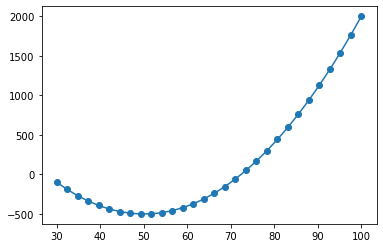

In [19]:
#make a polynomial model:
mymodel = np.poly1d(np.polyfit(x, y, 2))

myline = np.linspace(30, 100, 100, endpoint=True)

plt.scatter(x, y)
#line of polynomial regression:
plt.plot(myline, mymodel(myline))
plt.show()

In [75]:
mymodel

poly1d([ 1.00000199e+00, -1.00000222e+02,  2.00000579e+03])

# Bài 2: Tự sinh dữ liệu như ở hình dưới:

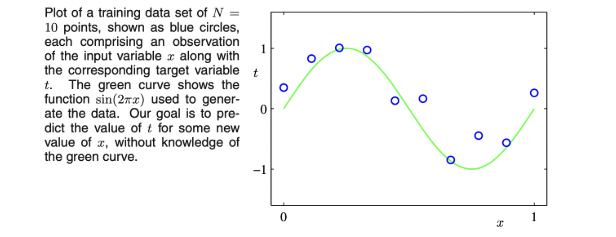

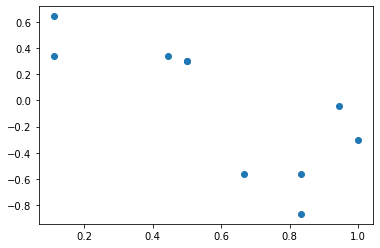

In [46]:
rdn.seed(82)
def generate_data(n):
    temp = np.linspace(0, 1, 19)
    x = rdn.choices(temp, k = n)
    t = pd.Series([np.sin(2*np.pi*i) + np.std(x) * rdn.choice([1, -1, 0]) for i in x])
    return pd.DataFrame({"x": x, "t":t})

data_10_points = generate_data(10)
plt.scatter(data_10_points["x"], data_10_points["t"])

In [47]:
class solution2:
    def __init__(self, data, x, y, power):
        self.data = data
        self.y = y
        self.power = power
        a = np.array([1]*len(data)) 
        self.x = [a]
        for i in range(1, power + 1):
            self.x.append(np.array(np.power(self.data[x], i)))
        self.x = np.array(self.x).transpose()
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def fit_new_data(self, new_data):
        self.data = new_data

    def predict(self, values):
        res = 0
        arr = np.array([])
        for i in range(0, self.power + 1):
            arr = np.append(arr, np.power(values, i))
        arr = arr.transpose()
        return arr.dot(self.model)
    
    def plot(self):
        variable = np.linspace(0, 1, 100)
        actual = [np.sin(2*np.pi*i) for i in variable]
        values = [self.predict(i) for i in variable]
        plt.scatter(self.data["x"], self.data["t"])
        plt.plot(variable, values, color = "r")
        plt.plot(variable, actual, color = "green")
        plt.legend(["predicted value", "sin(2pix)", "train value"])

    def ridge(self, alpha):
        xtx = (self.x).transpose().dot(self.x)
        return np.linalg.inv(xtx + np.identity(xtx.shape[0]).dot(alpha)).dot(self.x.transpose()).dot(self.data[self.y])
    
    def _predict_lasso(self, x):
        return x.dot(self.model) + self.b

    def lasso(self, learning_rate, lamda, iter):
        self.lamda = lamda
        self.iter = iter
        self.learning_rate = learning_rate
        self.m, self.n = self.x.shape
        self.model = np.zeros(self.n)
        self.b = 0
        for i in range(iter):
            self._update_w()
    
    def _update_w(self):
        t_pred = self._predict_lasso(self.x)
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.model[i] > 0:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) + self.lamda) / self.m 
            else:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) - self.lamda) / self.m
        db = - 2 * np.sum(self.data[self.y] - t_pred) / self.m
    
        self.model = self.model - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    
    def get_model(self):
        return self.model
    

# 2a: fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình

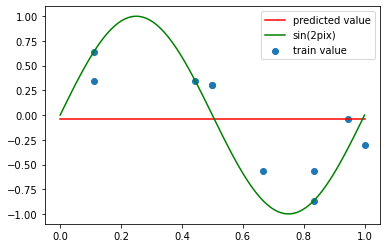

In [48]:
result = solution2(data_10_points, "x", "t", power=0)
result.plot()

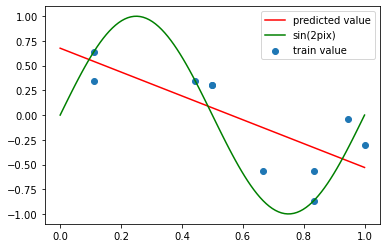

In [49]:
result = solution2(data_10_points, "x", "t", power=1)
result.plot()

**Model at power 0 and 1 gives poor fits to the data and gives poor representation of the function sin(2 pi x)**

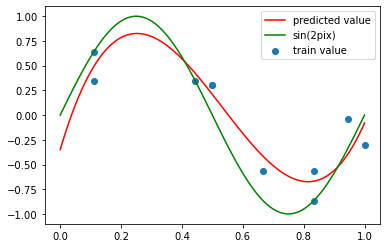

In [50]:
result = solution2(data_10_points, "x", "t", power=3)
result.plot()

**Model at power three gives relatively similar shape in comparison to the sin(2 pi x) curve, this may be the most suitable model if we know the information of the sin curve**

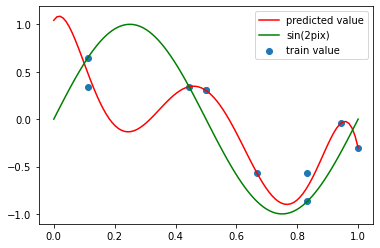

In [51]:
result = solution2(data_10_points, "x", "t", power=6)
result.plot()

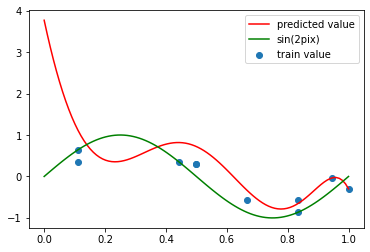

In [52]:
result = solution2(data_10_points, "x", "t", power=9)
result.plot()

**As the power gets higher, the curves fits closer to the training data points but it is not of the same shape as the sin curve. this is due to overfitting**

# 2b: thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

In [71]:
def kfold(train_data):
    result = []
    res = None
    for i in range(10):
        validation = train_data[train_data["fold"] == i]
        train = train_data.drop(validation.index)
        model = solution2(train, "x", "t", power = 9)
        predicted = validation.apply(lambda row: model.predict(row["x"]), axis = 1)
        res = mse(model, validation)
        print(f"validation fold {i}: mean squared error: {res:.3f}")
        result.append(np.mean(res))
    # return result

def mse(model, test):
    predicted = test.apply(lambda row: model.predict(row["x"]), axis = 1)
    result = np.mean(np.power(test["t"] - predicted,2))
    return result

def predict(model, values):
    res = 0
    arr = np.array([])
    for i in range(0, 9 + 1):
        arr = np.append(arr, np.power(values, i))
    arr = arr.transpose()
    return arr.dot(model)

In [73]:
# generate data and split train and test set
data_25_points = generate_data(25)
data_25_points_train = data_25_points.sample(frac = 0.8)
data_25_points_test = data_25_points.drop(index = data_25_points_train.index)
k_size = len(data_25_points)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_25_points_train["fold"] = fold

In [55]:
train_25 = solution2(data_25_points_train, "x", "t", power=9)
train_25.get_model()

array([-9.86348750e-02,  4.62699329e+01, -1.33161497e+03,  1.62383429e+04,
       -1.00157863e+05,  3.48575280e+05, -7.14105722e+05,  8.51374511e+05,
       -5.44728858e+05,  1.44090048e+05])

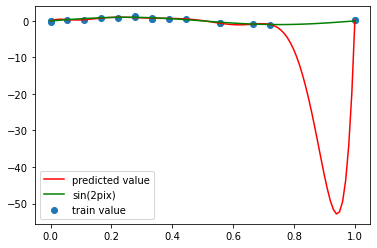

In [56]:
train_25.plot()

In [57]:
kfold(data_25_points_train)

validation fold 0: mean squared error: 0.027
validation fold 1: mean squared error: 0.042
validation fold 2: mean squared error: 11.351
validation fold 3: mean squared error: 0.155
validation fold 4: mean squared error: 0.028
validation fold 5: mean squared error: 0.011
validation fold 6: mean squared error: 113.133
validation fold 7: mean squared error: 0.012
validation fold 8: mean squared error: 0.087
validation fold 9: mean squared error: 0.194


In [58]:
compare = data_25_points_test.copy()
compare["predicted"] = compare.apply(lambda row: train_25.predict(row["x"]), axis = 1)
compare

,x,t,predicted
2,0.500000,0.293586,0.076705
3,0.500000,-0.293586,0.076705
13,0.666667,-0.866025,-0.878805
14,0.944444,-0.048434,-52.820717
17,0.277778,0.691222,0.913272


In [59]:
train_25.fit_new_data(data_25_points_test)

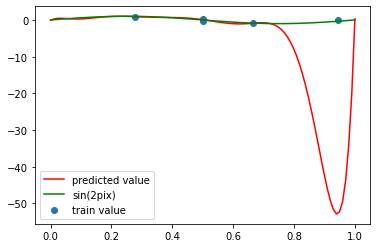

In [60]:
train_25.plot()

**The mse in each fold is quite high, and the prediction for the test set is not correct. In conlusion, the model is still over-fitted to the training data set, however, the shape of the predicted curve gets closer to the sin curve**

In [61]:
data_125_points = generate_data(125)
data_125_points_train = data_125_points.sample(frac = 0.8)
data_125_points_test = data_125_points.drop(index = data_125_points_train.index)
k_size = len(data_125_points_train)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_125_points_train["fold"] = fold

In [62]:
data_125_points_train.tail()

,x,t,fold
47,0.166667,0.866025,3
70,0.722222,-0.984808,0
36,0.111111,0.953134,9
85,0.388889,0.642788,4
92,1.000000,-0.310346,9


In [63]:
data_125_points_test.tail()

,x,t
102,0.166667,1.176372
108,0.444444,0.031674
110,0.611111,-0.642788
114,0.222222,1.295154
118,0.722222,-0.674461


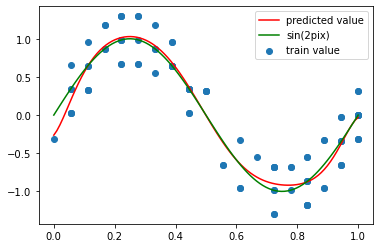

In [64]:
train_125 = solution2(data_125_points_train, "x", "t", power = 9)
train_125.plot()

In [65]:
kfold(data_125_points_train)

validation fold 0: mean squared error: 0.664
validation fold 1: mean squared error: 0.095
validation fold 2: mean squared error: 0.089
validation fold 3: mean squared error: 0.073
validation fold 4: mean squared error: 0.040
validation fold 5: mean squared error: 0.105
validation fold 6: mean squared error: 0.056
validation fold 7: mean squared error: 0.082
validation fold 8: mean squared error: 0.073
validation fold 9: mean squared error: 0.074


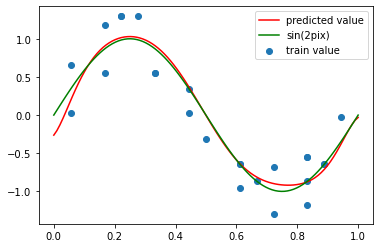

In [66]:
train_125.fit_new_data(data_125_points_test)
train_125.plot()

**The mse for each fold is significantly lower than that of the case of 25 data points and the predicted curve from the test set is similar to the sin curve. The model is now giving a fairly accurate prediction.**

# 2c: fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge và Lasso để tránh overfitting

In [67]:
model = solution2(data_10_points, "x", "t", power = 9)

[ 1.05958171 -1.73958145 -0.81391805 -0.18150554  0.1049258   0.22156148
  0.27032198  0.29832073  0.32517097  0.35784454]


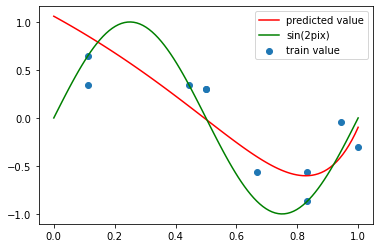

In [74]:
# ridge regression
model.model = model.ridge(-0.1)
print(model.get_model())
model.plot()

[ 1.86844329e-01 -5.97764438e-01 -5.85999871e-01 -3.51997142e-01
 -9.09078602e-02 -9.39489608e-05  1.87980818e-02  1.46011621e-01
  2.54468195e-01  3.38105320e-01]


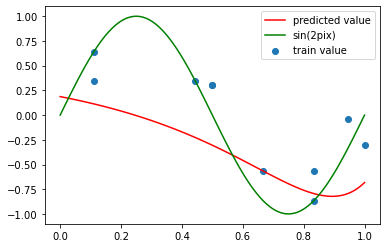

In [68]:
# lasso regression
model.lasso(learning_rate=0.2, lamda=0.1, iter = 100)
print(model.get_model())
model.plot()